## This notebook will examine the Outdoor Temperature Measurments from the UW ATMS Building 

https://mesowest.utah.edu/cgi-bin/droman/download_api2.cgi?stn=UWASH&hour1=20&min1=48&timetype=LOCAL&unit=0&graph=0

In [77]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import geopandas as gpd
#from shapely.geometry import Point, Polygon, box
#import fiona
#import pyproj
#import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors

#%matplotlib widget
%matplotlib inline

In [78]:
!ls

Outdoor ATMSDATA.ipynb       UWASH.2023-01-31.csv
UWASH.2022-02-12.csv         UWASH_cleaned_2023-01-31.csv
UWASH.2022-10-24.csv         UWASH_new_sheet_per_yr.xlsx


In [61]:
!pwd

/Users/amandaworthy/CS4EVN/UWASH Outdoor Data


In [62]:
UWASH= pd.read_csv("UWASH.2023-01-31.csv", sep=',', header=[10])
UWASH.head()

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,precip_accum_set_1,sea_level_pressure_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,heat_index_set_1d
0,NaN,NaN,Celsius,%,m/s,Degrees,m/s,Millimeters,Pascals,Celsius,Celsius,code,Celsius
1,UWASH,2023-01-01T12:55:00Z,5.56,100.0,0.0,82.0,0.0,0.0,101900.0,5.56,NaN,E,NaN
2,UWASH,2023-01-01T13:55:00Z,6.11,100.0,1.03,311.0,1.03,0.0,101950.0,6.11,NaN,NW,NaN
3,UWASH,2023-01-01T14:55:00Z,6.11,100.0,0.0,352.0,1.03,0.0,101990.0,6.11,NaN,N,NaN
4,UWASH,2023-01-01T15:55:00Z,6.11,100.0,0.0,90.0,0.51,0.0,101960.0,6.11,NaN,E,NaN


In [63]:
UWASH= UWASH.drop(['Station_ID'], axis=1)
list(UWASH.columns)


['Date_Time',
 'air_temp_set_1',
 'relative_humidity_set_1',
 'wind_speed_set_1',
 'wind_direction_set_1',
 'wind_gust_set_1',
 'precip_accum_set_1',
 'sea_level_pressure_set_1',
 'dew_point_temperature_set_1d',
 'wind_chill_set_1d',
 'wind_cardinal_direction_set_1d',
 'heat_index_set_1d']

In [64]:
#drop units 
UWASH= UWASH.drop(0,axis=0)
UWASH.head()

UWASH.Date_Time= pd.to_datetime(UWASH.Date_Time)
UWASH['Date_Time']= UWASH['Date_Time']

In [66]:
#convert all to numbers besides the wind, station, date

cols = UWASH.columns.drop(['Date_Time','wind_cardinal_direction_set_1d'])
#cols = UWASH.columns.drop(['Date_Time'])

UWASH[cols] = UWASH[cols].apply(pd.to_numeric, errors='coerce')

UWASH= UWASH.dropna(axis=1, how='all')
UWASH.head(5)


,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,precip_accum_set_1,sea_level_pressure_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d
1,2023-01-01 12:55:00+00:00,5.56,100.0,0.00,82.0,0.00,0.0,101900.0,5.56,NaN,E
2,2023-01-01 13:55:00+00:00,6.11,100.0,1.03,311.0,1.03,0.0,101950.0,6.11,NaN,NW
3,2023-01-01 14:55:00+00:00,6.11,100.0,0.00,352.0,1.03,0.0,101990.0,6.11,NaN,N
4,2023-01-01 15:55:00+00:00,6.11,100.0,0.00,90.0,0.51,0.0,101960.0,6.11,NaN,E
5,2023-01-01 16:55:00+00:00,6.11,100.0,0.51,313.0,1.03,0.0,102050.0,6.11,NaN,NW


In [67]:
UWASH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 1 to 710
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   Date_Time                       710 non-null    datetime64[ns, UTC]
 1   air_temp_set_1                  710 non-null    float64            
 2   relative_humidity_set_1         710 non-null    float64            
 3   wind_speed_set_1                710 non-null    float64            
 4   wind_direction_set_1            710 non-null    float64            
 5   wind_gust_set_1                 710 non-null    float64            
 6   precip_accum_set_1              339 non-null    float64            
 7   sea_level_pressure_set_1        710 non-null    float64            
 8   dew_point_temperature_set_1d    710 non-null    float64            
 9   wind_chill_set_1d               1 non-null      float64            
 10  wind_cardinal_

In [68]:
UWASH= UWASH.rename(columns= {"Date_Time": "Timestamp", 'air_temp_set_1': "outdoor_air_temp_C", 'relative_humidity_set_1': "outdoor_relative_humidity_%", 'wind_chill_set_1d': "outdoor_wind_chill_C", 'heat_index_set_1d': "heat_index_C", "wind_speed_set_1": "outdoor_wind_speed_mpers", 
                             "wind_direction_set_1": "outdoor_wind_direction_deg", "wind_gust_set_1": "Outdoor_wind_gust_mpers","precip_accum_set_1" : "precip_accum_mm","sea_level_pressure_set_1": "sea_level_pressure_pascals", "dew_point_temperature_set_1d": "dew_point_temperature_C",  "wind_cardinal_direction_set_1d": "wind_cardinal_direction"   })

UWASH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 1 to 710
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Timestamp                    710 non-null    datetime64[ns, UTC]
 1   outdoor_air_temp_C           710 non-null    float64            
 2   outdoor_relative_humidity_%  710 non-null    float64            
 3   outdoor_wind_speed_mpers     710 non-null    float64            
 4   outdoor_wind_direction_deg   710 non-null    float64            
 5   Outdoor_wind_gust_mpers      710 non-null    float64            
 6   precip_accum_mm              339 non-null    float64            
 7   sea_level_pressure_pascals   710 non-null    float64            
 8   dew_point_temperature_C      710 non-null    float64            
 9   outdoor_wind_chill_C         1 non-null      float64            
 10  wind_cardinal_direction      710 non-null    objec

In [69]:
#remove timezone bc excel doesnt like that 

#UWASH['Date_Time']= UWASH['Date_Time'].dt.tz_localize(None)

In [76]:
#uncomment out when want to minipulate data 

#UWASH.to_csv('UWASH_cleaned_2023-01-31.csv', index=False)

with pd.ExcelWriter("UWASH_new_sheet_per_yr.xlsx") as writer:
    for date, data in UWASH.groupby(UWASH['Date_Time'].dt.strftime('%Y')):
        data.to_excel(writer, sheet_name = date.replace('/', '_'), index=False)

In [71]:
UWASH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 1 to 710
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Timestamp                    710 non-null    datetime64[ns, UTC]
 1   outdoor_air_temp_C           710 non-null    float64            
 2   outdoor_relative_humidity_%  710 non-null    float64            
 3   outdoor_wind_speed_mpers     710 non-null    float64            
 4   outdoor_wind_direction_deg   710 non-null    float64            
 5   Outdoor_wind_gust_mpers      710 non-null    float64            
 6   precip_accum_mm              339 non-null    float64            
 7   sea_level_pressure_pascals   710 non-null    float64            
 8   dew_point_temperature_C      710 non-null    float64            
 9   outdoor_wind_chill_C         1 non-null      float64            
 10  wind_cardinal_direction      710 non-null    objec

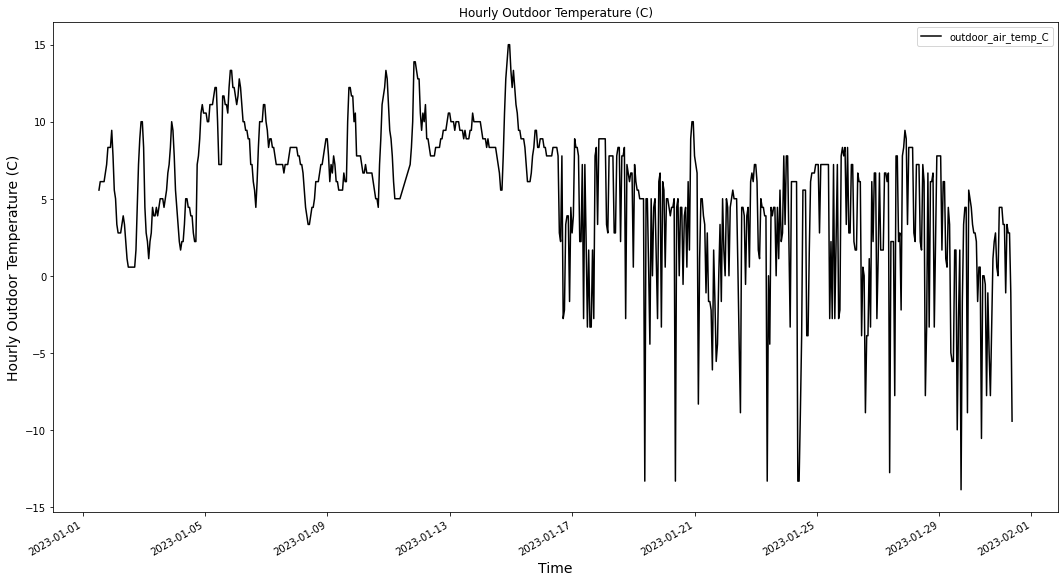

In [75]:
fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Hourly Outdoor Temperature (C)')

UWASH.plot(x='Timestamp', y='outdoor_air_temp_C',color='k', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Hourly Outdoor Temperature (C)",color='k',fontsize=14);

#UWASH.plot(x='Date_Time', y='relative_humidity_set_1', color='dodgerblue', marker='*', markerfacecolor='white', ax=ax2)

#ax2.set_ylabel("Hourly Relative Humidity (%)",fontsize=14, color='dodgerblue');
#ax2.get_legend().remove()
#ax.get_legend().remove()
#ax2.invert_yaxis()
#ax2.set_ylim(-20,30)

#plt.show();